#Project 4: Sun and moon positions calculations 

Group: Monika Juzek, Konrad Kwiecień, Jędrzej Walkowiak





First we will start with installing and importing required packages

In [44]:
!pip install astroplan

In [45]:
#@title Import modules

import numpy as np
import math
from datetime import time

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D

from astropy import units as u
from astropy.time import Time
from astropy.time import TimeDelta
from astroplan import Observer

import pytz

As we have all we need, let's set where our Observer will be. By default the polish city Katowice is set (also russian city Muramansk is already typed), but you can change it adding preferable longitude - first degrees, then minutes - and latitude - same scheme. Don't forget to change the 'name' parameter, so you always know, where the Observer really is!

In [46]:
observation_point = Observer(longitude=19*u.deg + 1*u.arcmin, latitude=50*u.deg+ 16 * u.arcmin, elevation=250*u.m, name="Katowice")
#observation_point = Observer(longitude=33*u.deg + 4 *u.arcmin, latitude=68*u.deg + 58 * u.arcmin, elevation=1*u.m, name="Murmansk")

print(observation_point)

<Observer: name='Katowice',
    location (lon, lat, el)=(19.016666666666666 deg, 50.26666666666667 deg, 250.00000000122301 m),
    timezone=<UTC>>


Now, we will set the observation time - it is going to be a period of one full day: 24h, midnight to midnight. 

In [47]:
time_start = Time('2020-12-08T00:00:00', format='isot', scale='utc')
time_end = Time('2020-12-09T00:00:00', format='isot', scale='utc')

Within given range, we will collect the information about the position of the sun in the form of a list of regularly distributed points - sunpaths_time. It will also create two additional lists: sunpaths_az - azimute values for calculated times, and sunpaths_alt - altitude values for calculated times. The code will return the number of points found within the range. 
The default value of the time step is 600 sec. If you need more/less points, you can modify the first argument in 'TimeDelta' function. The argument should be in sec too. 

In [48]:
sunpaths_time = list()

time_itr = time_start
itr = 0

while (time_itr < time_end):
  sunpaths_time.append(time_itr)
  time_itr = time_itr + TimeDelta(600,format='sec')
  itr+=1

print(str(itr)+' events found')

sunpaths_time = Time(sunpaths_time)
sunpaths_az = observation_point.sun_altaz(sunpaths_time).az.radian
sunpaths_alt = observation_point.sun_altaz(sunpaths_time).alt

145 events found


Now, we will do the same for the moon
moonpaths_time - list of time points regularly distributed as for sun
moonpaths_az - azimute values corresponding with time points
moonpaths_alt - altitude values correspondin with time points.

In [49]:
moonpaths_time = list()

time_itr = time_start
itr = 0

while (time_itr < time_end):
  moonpaths_time.append(time_itr)
  time_itr = time_itr + TimeDelta(600,format='sec')
  itr+=1

print(str(itr)+' events found')

moonpaths_time = Time(moonpaths_time)
moonpaths_az = observation_point.moon_altaz(moonpaths_time).az
moonpaths_alt = observation_point.moon_altaz(moonpaths_time).alt

145 events found


Let us now transform the lists above, so they contain only the values, when sun is above the horizon. 

In order to present sun position on the plot, we change sunpath_az values to (x,y) coordinates as follows: x = cos(sunpaths_az) and y = sin(sunpaths_az). Then, each coordinate is muliplied by 90.

In [50]:
sunpaths_time = sunpaths_time[sunpaths_alt >= 0]
sunpaths_az = sunpaths_az[sunpaths_alt >= 0]
sunpaths_alt = sunpaths_alt[sunpaths_alt >= 0]

sunpath_az_sin = np.sin(sunpaths_az)*90
sunpath_az_cos = np.cos(sunpaths_az)*90

And same for the moon.

In [51]:
moonpaths_time = moonpaths_time[moonpaths_alt >= 0]
moonpaths_az = moonpaths_az[moonpaths_alt >= 0]
moonpaths_alt = moonpaths_alt[moonpaths_alt >= 0]

moonpath_az_sin = np.sin(moonpaths_az)*90
moonpath_az_cos = np.cos(moonpaths_az)*90

Here we will plot the data calculated above.

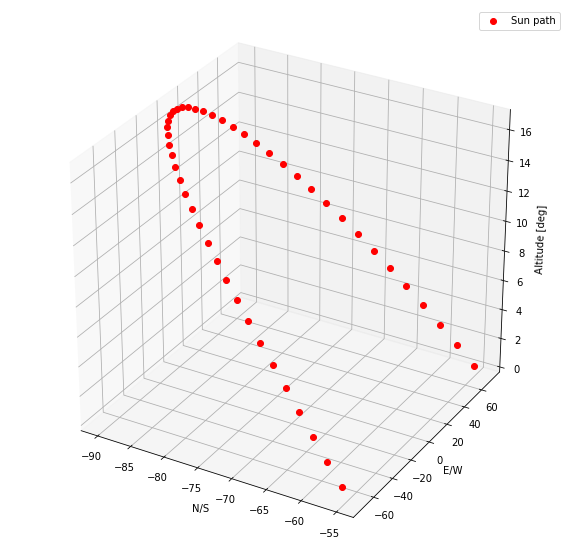

In [52]:
#define 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')


#Add description
ax.set_xlabel('N/S')
ax.set_ylabel('E/W')
ax.set_zlabel('Altitude [deg]')


#define values for each axis
x = sunpath_az_cos
y = sunpath_az_sin
z = sunpaths_alt


#Add plotline
ax.plot(x, y, z, 'o', label='Sun path', color ='red')


#Display
ax.legend()

ax.set_zlim(bottom = 0) 

#ax.set_ylim(Time('2000-01-01T09:00:00', format='isot', scale='utc').plot_date,Time('2000-01-01T12:00:00', format='isot', scale='utc').plot_date)
plt.show()

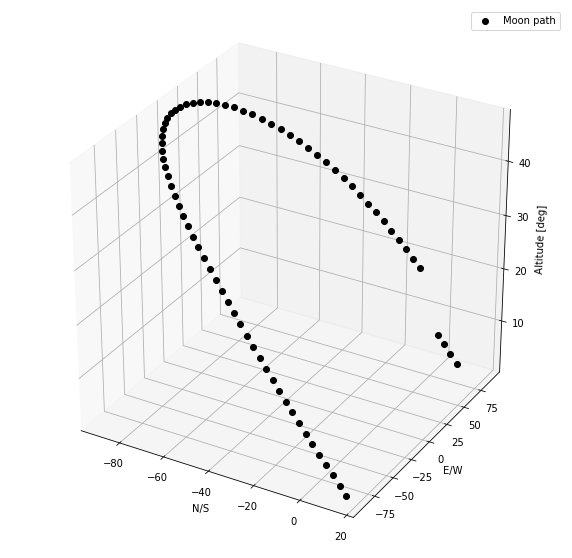

In [53]:
fig1 = plt.figure(figsize=(10,10))
bx = fig1.gca(projection='3d')

bx.set_xlabel('N/S')
bx.set_ylabel('E/W')
bx.set_zlabel('Altitude [deg]')


x1 = moonpath_az_cos
y1 = moonpath_az_sin
z1 = moonpaths_alt


bx.plot(x1, y1, z1, 'o', label='Moon path', color = 'black')
bx.legend()
#bx.set_zlim(bottom = 0)

plt.show()

Next we can plot alitude as a function of time for a specific day.

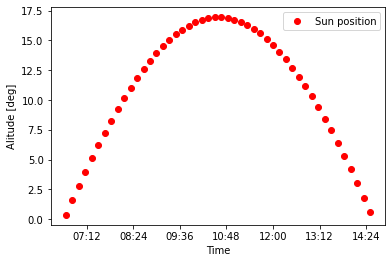

In [54]:
if len(sunpaths_time)>0:
  # Alitude of the Sun during the day
  x = sunpaths_alt

  #define y-axis values
  y = np.array([])
  for y_itr in sunpaths_time:
   isotinput = '2000-01-01T'+str(y_itr.ymdhms[3])+':'+str(y_itr.ymdhms[4])+':00'
   y = np.append(y,Time(isotinput, format='isot', scale='utc'))
  y = Time(y).plot_date


  plt.plot(y, x, 'o', label='Sun position', color = 'red')
  plt.xlabel('Time')
  plt.ylabel('Alitude [deg]')
  plt.legend()

  #Set y axis display
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

  plt.show()

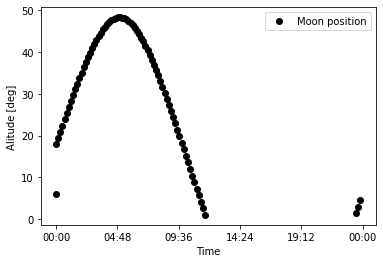

In [55]:
# Alitude of the Moon during the day
x = moonpaths_alt

#define y-axis values
y = np.array([])
for y_itr in moonpaths_time:
  isotinput = '2000-01-01T'+str(y_itr.ymdhms[3])+':'+str(y_itr.ymdhms[4])+':00'
  y = np.append(y,Time(isotinput, format='isot', scale='utc'))
y = Time(y).plot_date


plt.plot(y, x, 'o', label='Moon position', color = 'black')
plt.xlabel('Time')
plt.ylabel('Alitude [deg]')
plt.legend()

#Set y axis display
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

As we already know the sun path and the moon path during the given day, let's take a look at annual changes in position of the sun and moon on the sky.
First we have to adjust the correct period of time - a whole year.

In [56]:
time_start = Time('2020-01-01T00:00:00', format='isot', scale='utc')
time_end = Time('2021-01-01T00:00:00', format='isot', scale='utc')

Then, using similar method as presented above, we can collect information about sunrises and sunsets for each day during the year. Method sun_rise_time() computes time of the next sunrise, what is specified by argument: which="next". It can be changed also to 'previous' or 'nearest'.  As a result we obtain time and azimuth of the sunrise for each day.

In [57]:
#Get information about sunrises in given time range

sunrises = list()

time_itr = time_start
itr = 0

while (time_itr < time_end):

  sunrise = observation_point.sun_rise_time(time_itr, which="next")
  if str(sunrise) != '--':
    sunrise.format = 'isot'
    sunrises.append(sunrise)
    time_itr = sunrise + TimeDelta(3600,format='sec')
    itr+=1
  else:
    time_itr += TimeDelta(43200,format='sec')

print(str(itr)+' events found')

#Transform list into Time array
sunrises = Time(sunrises)

#Get azimuth
sunrises_az = observation_point.sun_altaz(sunrises).az

367 events found


The same goes for sunset information.

In [58]:
#Get information about sunset in given time range

sunsets = list()

time_itr = time_start
itr = 0

while (time_itr < time_end):

  sunset = observation_point.sun_set_time(time_itr, which="next")
  if str(sunset) != '--':
    sunset.format = 'isot'
    sunsets.append(sunset)
    time_itr = sunset + TimeDelta(3600,format='sec')
    itr+=1
  else:
    time_itr += TimeDelta(43200,format='sec')

print(str(itr)+' events found')
#Transform list into Time array
sunsets = Time(sunsets)

#Get azimuth
sunsets_az = observation_point.sun_altaz(sunsets).az

367 events found


With the new data we can plot the annual changes in sunrise and sunset time for the chosen location, as well as the azimuth.

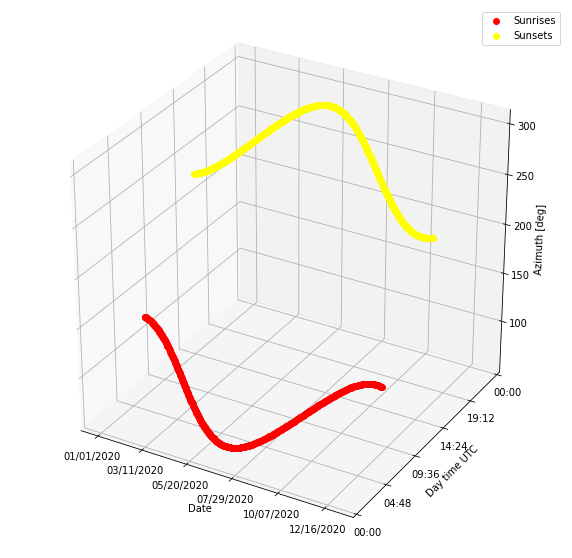

In [59]:
#Plot sunset and sunrise data

#define 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

#Add description
ax.set_xlabel('Date')
ax.set_ylabel('Day time UTC')
ax.set_zlabel('Azimuth [deg]')

#define values for each axis
x = sunrises.plot_date
z = sunrises_az
#define y-axis values
y = np.array([])
for y_itr in sunrises:
  isotinput = '2000-01-01T'+str(y_itr.ymdhms[3])+':'+str(y_itr.ymdhms[4])+':00'
  y = np.append(y,Time(isotinput, format='isot', scale='utc'))
y = Time(y).plot_date

#Add plotline
ax.plot(x, y, z, 'o', label='Sunrises', color ='red')
#ax.plot(x, y, z, label='Sunrises')

#define values for each axis
x = sunsets.plot_date
z = sunsets_az
#define y-axis values
y = np.array([])
for y_itr in sunsets:
  isotinput = '2000-01-01T'+str(y_itr.ymdhms[3])+':'+str(y_itr.ymdhms[4])+':00'
  y = np.append(y,Time(isotinput, format='isot', scale='utc'))
y = Time(y).plot_date

#Add plotline
ax.plot(x, y, z, 'o', label='Sunsets', color ='yellow')
#ax.plot(x, y, z, label='Sunsets')


#Set x axis display
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.xticks( np.arange (x.min(), x.max(), 70 ) )

#Set y axis display
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_ylim([Time('2000-01-01T00:00:00', format='isot', scale='utc').plot_date,Time('2000-01-02T00:00:00', format='isot', scale='utc').plot_date])

#Display
ax.legend()
plt.show()

#https://matplotlib.org/2.0.2/examples/mplot3d/text3d_demo.html

We can perform the same analysis to present the annual changes in moonrise and moonset time.


In [60]:
#Get information about sunrises in given time range

moonrises = list()

time_itr = time_start
itr = 0

while (time_itr < time_end):

  moonrise = observation_point.moon_rise_time(time_itr, which="next")
  if str(moonrise) != '--':
    moonrise.format = 'isot'
    moonrises.append(moonrise)
    time_itr = moonrise + TimeDelta(3600,format='sec')
    itr+=1
  else:
    time_itr += TimeDelta(43200,format='sec')

print(str(itr)+' events found')

#Transform list into Time array
moonrises = Time(moonrises)

#Get azimuth
moonrises_az = observation_point.moon_altaz(moonrises).az

355 events found


In [61]:
#Get information about sunset in given time range

moonsets = list()

time_itr = time_start
itr = 0

while (time_itr < time_end):

  moonset = observation_point.moon_set_time(time_itr, which="next")
  if str(moonset) != '--':
    moonset.format = 'isot'
    moonsets.append(moonset)
    time_itr = moonset + TimeDelta(3600,format='sec')
    itr+=1
  else:
    time_itr += TimeDelta(43200,format='sec')

print(str(itr)+' events found')
#Transform list into Time array
moonsets = Time(moonsets)

#Get azimuth
moonsets_az = observation_point.moon_altaz(moonsets).az

354 events found


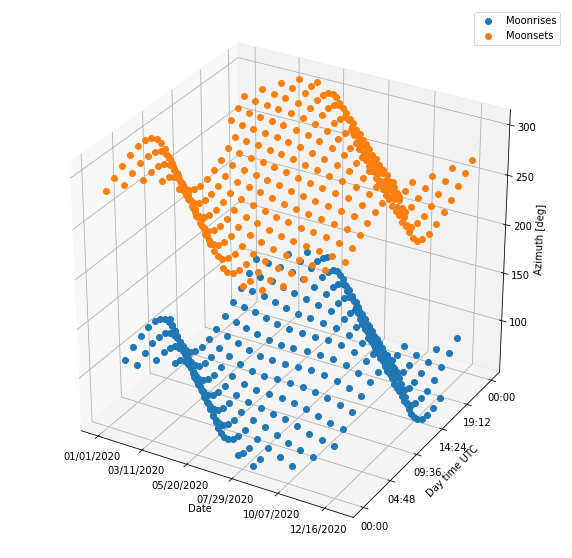

In [62]:
#Plot moonset and moonrise data

#define 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

#Add description
ax.set_xlabel('Date')
ax.set_ylabel('Day time UTC')
ax.set_zlabel('Azimuth [deg]')

#define values for each axis
x = moonrises.plot_date
z = moonrises_az
#define y-axis values
y = np.array([])
for y_itr in moonrises:
  isotinput = '2000-01-01T'+str(y_itr.ymdhms[3])+':'+str(y_itr.ymdhms[4])+':00'
  y = np.append(y,Time(isotinput, format='isot', scale='utc'))
y = Time(y).plot_date

#Add plotline
ax.plot(x, y, z,'o', label='Moonrises')

#define values for each axis
x = moonsets.plot_date
z = moonsets_az
#define y-axis values
y = np.array([])
for y_itr in moonsets:
  isotinput = '2000-01-01T'+str(y_itr.ymdhms[3])+':'+str(y_itr.ymdhms[4])+':00'
  y = np.append(y,Time(isotinput, format='isot', scale='utc'))
y = Time(y).plot_date

#Add plotline
ax.plot(x, y, z, 'o', label='Moonsets')


#Set x axis display
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.xticks( np.arange (x.min(), x.max(), 70 ) )

#Set y axis display
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

#Display
ax.legend()
plt.show()

#https://matplotlib.org/2.0.2/examples/mplot3d/text3d_demo.html